In [34]:
from matplotlib import pyplot as plt
import numpy as np
import ElementProperties
import pandas as pd
import datetime
#scipy for constants?

In [35]:
ElementProperties.atomic_masses['Fe']

55.845

# Convert from At% to Wt%
Alloys can be refered to both in weight percent and atom percent

Weight percent is useful when synthesising as you can easily measure out componenets

Atom percent is useful for representing the proportions between alloying components

formula converting At% to Wt%:

$Wt\%\:(C_i) = \frac{At\%(C_i)*Atomic weight(C_i)}{\sum_{j=n}^{N}C_j}*100$

formula converting Wt% to At%: !UPDATE!

$At\%\:(C_i) = \frac{At\%(C_i)*Atomic weight(C_i)}{\sum_{j=n}^{N}C_j}*100$

program written with help from ChatGPT

In [36]:
def atomicPercentToWegihtPercent(AlloyCompositionAtomic, atomic_masses = ElementProperties.atomic_masses):
    """AlloyCompositionAtomic is a dictionary with Element being Key and atomic percent being Value"""
    #calculate total mass
    elements = list(AlloyCompositionAtomic.keys())
    totalMass = 0.0
    for element in elements:
        totalMass += AlloyCompositionAtomic[element]*atomic_masses[element]
    
    AlloyCompositionWeight = {}
    for element in elements:
        AlloyCompositionWeight[element] = AlloyCompositionAtomic[element]*atomic_masses[element]*100 / totalMass
        
    return AlloyCompositionWeight

In [37]:
def WeightPercent_To_AtomicPercent(AlloyCompositionWeight, atomic_masses = ElementProperties.atomic_masses):
    """AlloyCompositionWeight is a dictionary with Element being Key and atomic percent being Value"""
    #calculate total mass
    elements = list(AlloyCompositionWeight.keys())
    totalAtomicMass = 0.0
    for element in elements:
        totalAtomicMass += AlloyCompositionWeight[element]/atomic_masses[element]
    
    AlloyCompositionAtomic = {}
    for element in elements:
        #AlloyCompositionWeight[element] = AlloyCompositionAtomic[element]*atomic_masses[element]*100 / totalMass
        AlloyCompositionAtomic[element] = AlloyCompositionWeight[element]*100/ (totalAtomicMass*atomic_masses[element] )
        
    return AlloyCompositionAtomic

In [38]:
B11 = {"Ti": 2.00, "V": 0.91, "Nb": 2.29, "Hf": 4.38}

B11Wt = measured_weight_to_weight_percent(B11)

B11At = WeightPercent_To_AtomicPercent(B11Wt)

B11At

NameError: name 'measured_weight_to_WtPercent' is not defined

In [39]:
Ti38V15Nb23Hf24 = {"Ti": 38.0, "V": 15.0, "Nb": 23.0, "Hf": 24.0}

Ti38V15Nb23Hf24_Wt = atomicPercentToWegihtPercent(Ti38V15Nb23Hf24)

Ti38V15Nb23Hf24_At = WeightPercent_To_AtomicPercent(Ti38V15Nb23Hf24_Wt)

Ti38V15Nb23Hf24_At

{'Ti': 37.99999999999999,
 'V': 14.999999999999998,
 'Nb': 22.999999999999996,
 'Hf': 24.0}

In [40]:
def measured_weight_to_WtPercent(MeasuredWeight, atomic_masses = ElementProperties.atomic_masses):
    """Calculates weight percent composition based on raw material of element composition you have measured for the sample"""
    elements = list(MeasuredWeight.keys())
    totalMass = 0.0

    for element in elements:
        totalMass += MeasuredWeight[element]

    AlloyCompositionWeightPercent = {}
    for element in elements:
        AlloyCompositionWeightPercent[element] = MeasuredWeight[element]/totalMass*100

    return AlloyCompositionWeightPercent


In [41]:
B11 = {"Ti": 2.00, "V": 0.91, "Nb": 2.29, "Hf": 4.38}

measured_weight_to_WtPercent(B11)

{'Ti': 20.876826722338205,
 'V': 9.498956158663884,
 'Nb': 23.903966597077243,
 'Hf': 45.72025052192067}

# Estimated alloy density
Estimated by calculating the weighted average atomic radii, then using the following formula to find density:

$ρ = \frac{Z*M_m}{N_A*a^3}*unit\:cell\:factor$

where:   
    $ρ\: =\: density \:[Kg*m^3]$   
    $Z \:=\: number\: of\: atoms\: per\: unit\: cell$   
    $M_m\: =\: Molar\:mass\:[Kg/mol]$     
    $a\: = \: average\:atomic\:mass [Kg]$   
    
This only works for alloys/phases with a primarily cubic unit cell    
FCC has 4 atoms per unit cell   
BCC has 2 atoms per unit cell   
Simple cubic has 1 atom per unit cell   

In [42]:
def alloyAverageAtomicRadii(alloyCompositionAtomic, atomic_radii_pm = ElementProperties.atomic_radii_pm):
    """returns average alloy particle radius in picometre"""
    #this uses a weighted average
    WeightedAlloyRadii = []
    for element in alloyCompositionAtomic:
        WeightedAlloyRadii.append(alloyCompositionAtomic[element]*atomic_radii_pm[element]/100) 
    weightedAlloyRadii = np.array(WeightedAlloyRadii)
#     alloyAverageAtomicRadius = np.sum(weightedAlloyRadii)/len(weightedAlloyRadii)
    alloyAverageAtomicRadius = np.sum(weightedAlloyRadii)
    return alloyAverageAtomicRadius

In [43]:
def alloyAverageAtomicMass(alloyCompositionAtomic, atomic_masses = ElementProperties.atomic_masses):
    """returns average alloy particle mass in g/Mol"""
    #this uses a weighted average
    WeightedAlloyMolarMass = []
    for element in alloyCompositionAtomic:
        WeightedAlloyMolarMass.append(alloyCompositionAtomic[element]*atomic_masses[element]/100) 
    WeightedAlloyMolarMass = np.array(WeightedAlloyMolarMass)
#     alloyAverageAtomicRadius = np.sum(weightedAlloyRadii)/len(weightedAlloyRadii)
    alloyAverageAtomMolarMass = np.sum(WeightedAlloyMolarMass)
    return alloyAverageAtomMolarMass

In [44]:
def estimateAlloyDensity(alloyCompositionAtomic, metallic_densities_g_per_cm3 = ElementProperties.metallic_densities_g_per_cm3):
    """returns estimated alloy density in g/cm^3"""
#     a = a*10**(-10) #to convert from pm to cm
#     N_a = 6.02*10**23
#     estimatedAlloyDensity = Z*M_m/(N_a*(a*16/3)**3)
    estimatedAlloyDensity = 0
    for element in alloyCompositionAtomic:
        estimatedAlloyDensity += alloyCompositionAtomic[element]*metallic_densities_g_per_cm3[element]/100
    return estimatedAlloyDensity

In [45]:
ElementProperties.metallic_densities_g_per_cm3['Si']

2.33

# Price of alloy 
Based on apprximate raw material prices only

In [46]:
def alloyPrice(AlloyCompositionWeight, element_prices_per_kg = ElementProperties.element_prices_per_kg):
    "Calculate the price of an alloy based on rough raw material price in USD (not accounting for processing). 1st principles model"
    AlloyPrice = 0
    elements = list(AlloyCompositionWeight.keys())
    
    for element in elements:
        AlloyPrice += AlloyCompositionWeight[element]/100*element_prices_per_kg[element]
    
    return AlloyPrice

## Try to write to a dataframe and turn into CSV

In [47]:
alloys = [{"Ti":38.0, "V":15.0, "Nb":23.0, "Hf":24.0},
        {"Ti": 25.0, "V": 25.0, "Nb": 25.0, "Hf": 25.0},
        {"Ti": 12.0, "V": 13.0, "Nb":16.0, "Mo": 24.0, "Ta":20.0, "W":15.0},
        {"Ti": 16.7, "V": 16.7, "Nb":16.7, "Mo": 16.7, "Ta":16.7, "W":16.7},
        {"V": 23.0, "Cr": 31.0, "Mo": 17.0, "Hf": 29.0},
        {"V": 25.0, "Cr": 25.0, "Mo": 25.0, "Hf": 25.0},
        {"Ti": 11.0, "Zr": 40.0, "Hf": 49.0},
        {"Ti": 33.0, "Zr": 33.0, "Hf": 33.0},
        {"Ti": 50.0, "V": 20.0, "Nb":30.0},
        {"Ti": 33.0, "V": 33.0, "Nb":33.0},
        {"Ti": 49.0, "V": 19.0, "Hf": 32.0},
        {"Ti": 33.0, "V": 33.0, "Hf": 33.0},
        ]

WeightPercent = []
Price = []
Density = []

AtPercentShorthand = []
WtPercentShorthand = []

for alloy in alloys:
    alloy_Wt = atomicPercentToWegihtPercent(alloy)
    WeightPercent.append(alloy_Wt)
    Price.append(alloyPrice(alloy_Wt))
    Density.append(estimateAlloyDensity(alloy_Wt))
    AtPercentShorthand.append(dictionary_to_alloy_shorthand(alloy))
    WtPercentShorthand.append(DictionaryToAlloyShorthand(alloy_Wt))

""" alloyArray = np.array([AtPercentShorthand, WtPercentShorthand, Price, Density])

alloyArray = np.transpose(alloyArray) """

alloyDict = {'Composition / At%' : AtPercentShorthand,
             'Composition / Wt%' : WtPercentShorthand,
             'Price / USD' : Price,
             'Density / g cm-3': Density}

alloyData = pd.DataFrame(alloyDict)
#alloyData.columns = ['Composition / At%', 'Composition / Wt%', 'Price / USD', 'Density / g cm-3']
alloyData.dtypes

Composition / At%     object
Composition / Wt%     object
Price / USD          float64
Density / g cm-3     float64
dtype: object

In [48]:
alloyData.to_excel('AlloyData_09oct23.xlsx')
alloyData

,Composition / At%,Composition / Wt%,Price / USD,Density / g cm-3
0,Ti(38.0)V(15.0)Nb(23.0)Hf(24.0),Ti(20.2)V(8.49)Nb(23.7)Hf(47.6),2583.730088,9.794184
1,Ti(25.0)V(25.0)Nb(25.0)Hf(25.0),Ti(12.9)V(13.8)Nb(25.1)Hf(48.2),2619.881347,9.990582
2,Ti(12.0)V(13.0)Nb(16.0)Mo(24.0)Ta(20.0)W(15.0),Ti(5.04)V(5.81)Nb(13.0)Mo(20.2)Ta(31.7)W(24.2),71.109765,13.702657
3,Ti(16.7)V(16.7)Nb(16.7)Mo(16.7)Ta(16.7)W(16.7),Ti(7.34)V(7.81)Nb(14.2)Mo(14.7)Ta(27.7)W(28.2),65.877837,13.572136
4,V(23.0)Cr(31.0)Mo(17.0)Hf(29.0),V(12.2)Cr(16.8)Mo(17.0)Hf(54.0),2925.296185,10.876347
5,V(25.0)Cr(25.0)Mo(25.0)Hf(25.0),V(13.5)Cr(13.8)Mo(25.4)Hf(47.3),2568.107902,10.709203
6,Ti(11.0)Zr(40.0)Hf(49.0),Ti(4.07)Zr(28.2)Hf(67.7),3683.510694,11.030721
7,Ti(33.0)Zr(33.0)Hf(33.0),Ti(15.1)Zr(28.7)Hf(56.2),3064.590142,10.028848
8,Ti(50.0)V(20.0)Nb(30.0),Ti(38.6)V(16.4)Nb(45.0),27.642686,6.594431
9,Ti(33.0)V(33.0)Nb(33.0),Ti(25.0)V(26.6)Nb(48.5),31.542519,6.900146


## Try to make latex tables from pandas

In [49]:
alloyData.to_latex("AlloyData_Latex table")

C:\Users\sigur\AppData\Local\Temp\ipykernel_11304\3743720027.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  alloyData.to_latex("AlloyData_Latex table")


## Try write to excel for a set of alloys for alloy preparation

In [138]:
pd.set_option('display.max_colwidth', None)

alloys = [{"Ti":38.0, "V":15.0, "Nb":23.0, "Hf":24.0},
          {"Ti": 25.0, "V": 25.0, "Nb": 25.0, "Hf": 25.0},
          {"Ti": 20.0, "V": 20.0, "Nb": 20.0, "Hf": 20.0, "Si": 20.0},
          {"Ti":38.0, "V":15.0, "Nb":23.0, "Hf":23.0, "Si": 1.0},
          {"Ti": 20.0, "V": 20.0, "Nb": 20.0, "Hf": 20.0, "Cr": 20.0}
]

TargetWeight = 10 #target weight in grams

TargetComponentWeights = []
WeightPercent = []
Price = []
Density = []
ComponentWegihts = []
ExperimentalComponentWeights = []

AtPercentShorthand = []
WtPercentShorthand = []

for alloy in alloys:
    alloy_Wt = atomicPercentToWegihtPercent(alloy)
    WeightPercent.append(alloy_Wt)
    Price.append(alloyPrice(alloy_Wt))
    Density.append(estimateAlloyDensity(alloy_Wt))
    AtPercentShorthand.append(dictionary_to_alloy_latex_shorthand(alloy))
    WtPercentShorthand.append(dictionary_to_alloy_latex_shorthand(alloy_Wt))

    TargetComponentWeight = "\makecell[l]{"
    ExperimentalComponentWeight = "\makecell[l]{"
    #TargetComponentWeight = "\\begin{tabular}{l}\\"
    #ExperimentalComponentWeight = ":\\begin{tabular}{l}\\"
    for element in alloy:
        TargetComponentWeight += fr' {element} : { alloy_Wt[element]*TargetWeight/100:.2f} g \\'
        ExperimentalComponentWeight += fr' {element} :\\'

    TargetComponentWeight += '}'
    ExperimentalComponentWeight += '}'
    ComponentWegihts.append(TargetComponentWeight)
    ExperimentalComponentWeights.append(ExperimentalComponentWeight)
    TargetComponentWeights.append(fr'{TargetWeight} g')

""" alloyArray = np.array([AtPercentShorthand, WtPercentShorthand, Price, Density])

alloyArray = np.transpose(alloyArray) """

alloyDict = {'\thead{Composition / At\%}' : AtPercentShorthand,
             '\thead{Composition / Wt\%}' : WtPercentShorthand,
             '\thead{Target weight \\\sample}': TargetComponentWeights,
             '\thead{Target weight per element}': ComponentWegihts,
             '\thead{Measure weight per element}': ExperimentalComponentWeights
            }
             #'Density / g cm^{-3}': Density,
             #'Price / USD' : Price

alloyData = pd.DataFrame(alloyDict)
#alloyData.columns = ['Composition / At%', 'Composition / Wt%', 'Price / USD', 'Density / g cm-3']
alloyData.to_latex("First batch of samples calculations_latex table4.tex", escape=False)

#alloyData.to_excel(f"First batch of samples calculation_10oct23.xlsx")

,\thead{Composition / At\%},\thead{Composition / Wt\%},\thead{Target weight \sample},\thead{Target weight per element},\thead{Measure weight per element}
0,Ti_{38.0}V_{15.0}Nb_{23.0}Hf_{24.0},Ti_{20.2}V_{8.49}Nb_{23.7}Hf_{47.6},10 g,\makecell[l]{ Ti : 2.02 g \\ V : 0.85 g \\ Nb : 2.37 g \\ Hf : 4.76 g \\},\makecell[l]{ Ti :\\ V :\\ Nb :\\ Hf :\\}
1,Ti_{25.0}V_{25.0}Nb_{25.0}Hf_{25.0},Ti_{12.9}V_{13.8}Nb_{25.1}Hf_{48.2},10 g,\makecell[l]{ Ti : 1.29 g \\ V : 1.38 g \\ Nb : 2.51 g \\ Hf : 4.82 g \\},\makecell[l]{ Ti :\\ V :\\ Nb :\\ Hf :\\}
2,Ti_{20.0}V_{20.0}Nb_{20.0}Hf_{20.0}Si_{20.0},Ti_{12.0}V_{12.8}Nb_{23.3}Hf_{44.8}Si_{7.05},10 g,\makecell[l]{ Ti : 1.20 g \\ V : 1.28 g \\ Nb : 2.33 g \\ Hf : 4.48 g \\ Si : 0.71 g \\},\makecell[l]{ Ti :\\ V :\\ Nb :\\ Hf :\\ Si :\\}
3,Ti_{38.0}V_{15.0}Nb_{23.0}Hf_{23.0}Si_{1.0},Ti_{20.5}V_{8.63}Nb_{24.1}Hf_{46.4}Si_{0.317},10 g,\makecell[l]{ Ti : 2.05 g \\ V : 0.86 g \\ Nb : 2.41 g \\ Hf : 4.64 g \\ Si : 0.03 g \\},\makecell[l]{ Ti :\\ V :\\ Nb :\\ Hf :\\ Si :\\}
4,Ti_{20.0}V_{20.0}Nb_{20.0}Hf_{20.0}Cr_{20.0},Ti_{11.3}V_{12.1}Nb_{22.0}Hf_{42.3}Cr_{12.3},10 g,\makecell[l]{ Ti : 1.13 g \\ V : 1.21 g \\ Nb : 2.20 g \\ Hf : 4.23 g \\ Cr : 1.23 g \\},\makecell[l]{ Ti :\\ V :\\ Nb :\\ Hf :\\ Cr :\\}


In [139]:
ComponentWegihts

['\\makecell[l]{ Ti : 2.02 g \\\\ V : 0.85 g \\\\ Nb : 2.37 g \\\\ Hf : 4.76 g \\\\}',
 '\\makecell[l]{ Ti : 1.29 g \\\\ V : 1.38 g \\\\ Nb : 2.51 g \\\\ Hf : 4.82 g \\\\}',
 '\\makecell[l]{ Ti : 1.20 g \\\\ V : 1.28 g \\\\ Nb : 2.33 g \\\\ Hf : 4.48 g \\\\ Si : 0.71 g \\\\}',
 '\\makecell[l]{ Ti : 2.05 g \\\\ V : 0.86 g \\\\ Nb : 2.41 g \\\\ Hf : 4.64 g \\\\ Si : 0.03 g \\\\}',
 '\\makecell[l]{ Ti : 1.13 g \\\\ V : 1.21 g \\\\ Nb : 2.20 g \\\\ Hf : 4.23 g \\\\ Cr : 1.23 g \\\\}']

In [140]:
alloyData.to_latex("First batch of samples calculations_latex table4.tex", escape=False)

C:\Users\sigur\AppData\Local\Temp\ipykernel_11304\3273854010.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  alloyData.to_latex("First batch of samples calculations_latex table4.tex", escape=False)


In [141]:
print(datetime.date.today())

2023-10-13


In [53]:
test= np.array([[1, 2], [3, 4]])

np.savetxt("test2.txt", test)

In [54]:
import os
os.getcwd()

'c:\\Users\\sigur\\OneDrive - Imperial College London\\[01] MEng project\\[03] Computer calculators'

## convert from dictionary form to shorthand

In [55]:
def DictionaryToAlloyShorthand(AlloyDict):
    AlloyDictKeys = list(AlloyDict.keys())
    
    shorthand = ""
    for key in AlloyDictKeys:
            shorthand += f"{key}({float(AlloyDict[key]):.3})"

    return shorthand


In [56]:
DictionaryToAlloyShorthand({"Ti": 16.7, "V": 16.7, "Nb":16.7, "Mo": 16.7, "Ta":16.7, "W":16.7})

'Ti(16.7)V(16.7)Nb(16.7)Mo(16.7)Ta(16.7)W(16.7)'

In [86]:
def dictionary_to_alloy_latex_shorthand(AlloyDict):
    AlloyDictKeys = list(AlloyDict.keys())
    
    shorthand = ""
    for key in AlloyDictKeys:
            shorthand += rf"{key}_{'{'}{float(AlloyDict[key]):.3}{'}'}"

    return shorthand

In [87]:
dictionary_to_alloy_latex_shorthand({"Ti": 16.7, "V": 16.7, "Nb":16.7, "Mo": 16.7, "Ta":16.7, "W":16.7})

'Ti_{16.7}V_{16.7}Nb_{16.7}Mo_{16.7}Ta_{16.7}W_{16.7}'

In [57]:
SolidusLiquidus = np.load("SolidusLiquidusData_09oct23.npy")
SolidusLiquidus = np.transpose(SolidusLiquidus)
SolidusLiquidusDF = pd.DataFrame(SolidusLiquidus)
SolidusLiquidusDF.columns = ["Alloy", "Liquidus / K", "Solidus / K"]
SolidusLiquidusDF

,Alloy,Liquidus / K,Solidus / K
0,Ti38.0V15.0Nb23.0Hf24.0,2023.2852112753244,1922.7023906811546
1,Ti25.0V25.0Nb25.0Hf25.0,1999.992785262645,1862.6617607621442
2,Ti12.0V13.0Nb16.0Mo24.0Ta20.0W15.0,2895.1199713229216,2706.8022017812427
3,Ti16.7V16.7Nb16.7Mo16.7Ta16.7W16.7,2829.512591613624,2568.112154678725


In [58]:
def npyToDataframe(npyFile, headerRow = []):
    DummyArray = np.load(npyFile)
    DummyArray = np.transpose(DummyArray)
    Dataframe = pd.DataFrame(DummyArray)
    if headerRow != []:
        Dataframe.columns = headerRow
    return Dataframe


In [59]:
SolidusLiquidus_TCHEA2 = npyToDataframe("SolidusLiquidusData_TCHEA2_09oct23.npy", ["Alloy", "Liquidus / K", "Solidus / K"])
SolidusLiquidus_TCHEA2

ValueError: Length mismatch: Expected axis has 6 elements, new values have 3 elements

In [60]:
SolidusLiquidus_TCNI8 = npyToDataframe("SolidusLiquidusData_TCNI8_09oct23.npy", ["Alloy Composition / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_TCNI8

,Alloy Composition / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,Ti38.0V15.0Nb23.0Hf24.0,2023.2852112753324,1750.1452112753323,1922.7023906811467,1649.5623906811466,100.5828205941857
1,Ti25.0V25.0Nb25.0Hf25.0,1999.9927852626454,1726.8527852626453,1862.6617607621306,1589.5217607621307,137.33102450051456
2,Ti12.0V13.0Nb16.0Mo24.0Ta20.0W15.0,2895.1199713229216,2621.9799713229218,2706.802201781246,2433.662201781246,188.31776954167572
3,Ti16.7V16.7Nb16.7Mo16.7Ta16.7W16.7,2829.5125916136158,2556.372591613616,2568.112154678729,2294.972154678729,261.4004369348868
4,V23.0Cr31.0Mo17.0Hf29.0,2074.7259722712,1801.5859722712003,1706.9091907457587,1433.7691907457588,367.81678152544146
5,V25.0Cr25.0Mo25.0Hf25.0,2268.92268029639,1995.78268029639,1870.7146966868168,1597.5746966868169,398.20798360957315
6,Ti11.0Zr40.0Hf49.0,2249.651278281064,1976.5112782810643,2193.566722763865,1920.4267227638652,56.08455551719908
7,Ti33.0Zr33.0Hf33.0,2060.1300335220926,1786.9900335220927,2008.275223067735,1735.1352230677348,51.8548104543579
8,Ti50.0V20.0Nb30.0,2100.962156357618,1827.822156357618,2029.5913414623992,1756.4513414623993,71.3708148952187
9,Ti33.0V33.0Nb33.0,2117.3382765867304,1844.1982765867306,2042.8084352540666,1769.6684352540665,74.52984133266409


In [61]:
SolidusLiquidus_TCNI11 = npyToDataframe("SolidusLiquidusData_TCNI11_09oct23.npy", ["Alloy Composition / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_TCNI11

,Alloy Composition / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,0.0,2023.285211,1750.145211,1922.702391,1649.562391,100.582821
1,0.5,2015.122064,1741.982064,943.290433,670.150433,1071.831631
2,1.0,2006.505436,1733.365436,909.342974,636.202974,1097.162461
3,1.5,1997.457186,1724.317186,737.540550,464.400550,1259.916636
4,2.0,1987.998895,1714.858895,727.664642,454.524642,1260.334253
5,2.5,1978.151652,1705.011652,718.336040,445.196040,1259.815611
6,3.0,1967.935862,1694.795862,707.481779,434.341779,1260.454083
7,3.5,1957.371094,1684.231094,695.156477,422.016477,1262.214617
8,4.0,1946.475976,1673.335976,681.675736,408.535736,1264.800240
9,4.5,1935.265284,1662.125284,667.388106,394.248106,1267.877178


In [62]:
SolidusLiquidus_TCHEA2 = npyToDataframe("SolidusLiquidusData_TCHEA2_09oct23.npy", ["Alloy Composition / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_TCHEA2

,Alloy Composition / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,Ti38.0V15.0Nb23.0Hf24.0,2023.2852112753244,1750.1452112753245,1922.7023906811546,1649.5623906811547,100.58282059416979
1,Ti25.0V25.0Nb25.0Hf25.0,1999.992785262645,1726.8527852626448,1862.6617607621442,1589.5217607621444,137.33102450050046
2,Ti12.0V13.0Nb16.0Mo24.0Ta20.0W15.0,2895.1199713229216,2621.9799713229218,2706.8022017812427,2433.662201781243,188.3177695416789
3,Ti16.7V16.7Nb16.7Mo16.7Ta16.7W16.7,2829.512591613624,2556.372591613624,2568.112154678725,2294.972154678725,261.40043693489906
4,V23.0Cr31.0Mo17.0Hf29.0,2156.3350999511918,1883.1950999511919,1968.7074280184431,1695.567428018443,187.62767193274885
5,V25.0Cr25.0Mo25.0Hf25.0,2268.9226802963894,1995.7826802963896,2054.7541464773126,1781.6141464773127,214.16853381907686
6,Ti11.0Zr40.0Hf49.0,2249.6512782810573,1976.5112782810575,2193.5667227638646,1920.4267227638647,56.08455551719271
7,Ti33.0Zr33.0Hf33.0,2060.130033522095,1786.990033522095,2008.2752230677363,1735.1352230677362,51.85481045435881
8,Ti50.0V20.0Nb30.0,2100.962156357623,1827.822156357623,2029.5913414624035,1756.4513414624034,71.37081489521961
9,Ti33.0V33.0Nb33.0,2117.3382765867223,1844.1982765867224,2042.808435254065,1769.6684352540651,74.52984133265727


In [63]:
SolidusLiquidus_TCHEA6 = npyToDataframe("SolidusLiquidusData_TCHEA6_09oct23.npy", ["Alloy Composition / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_TCHEA6

,Alloy Composition / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,Ti38.0V15.0Nb23.0Hf24.0,2022.803502185587,1749.6635021855868,1919.4622267701154,1646.3222267701153,103.3412754154715
1,Ti25.0V25.0Nb25.0Hf25.0,1999.5232032497634,1726.3832032497635,1859.8990370311178,1586.7590370311177,139.62416621864577
2,Ti12.0V13.0Nb16.0Mo24.0Ta20.0W15.0,2889.1296051901913,2615.9896051901915,2736.5391699556394,2463.3991699556395,152.59043523455193
3,Ti16.7V16.7Nb16.7Mo16.7Ta16.7W16.7,2827.329402283328,2554.189402283328,2627.362206979269,2354.2222069792692,199.9671953040588
4,V23.0Cr31.0Mo17.0Hf29.0,2162.3195121439812,1889.1795121439814,1945.1749987262478,1672.034998726248,217.14451341773338
5,V25.0Cr25.0Mo25.0Hf25.0,2210.9510905020607,1937.8110905020608,2016.3649324972757,1743.2249324972759,194.58615800478492
6,Ti11.0Zr40.0Hf49.0,2249.6512782810523,1976.5112782810525,2193.566722763865,1920.4267227638652,56.084555517187255
7,Ti33.0Zr33.0Hf33.0,2060.130033522101,1786.990033522101,2008.275223067742,1735.1352230677421,51.85481045435881
8,Ti50.0V20.0Nb30.0,2100.3910546322354,1827.2510546322355,2025.0472030767944,1751.9072030767943,75.34385155544123
9,Ti33.0V33.0Nb33.0,2117.0724170327844,1843.9324170327845,2039.134408133193,1765.9944081331928,77.93800889959175


In [64]:
SolidusLiquidus_SiVar_TCHEA6 = npyToDataframe("SolidusLiquidusData_Si variation_TiVNbHf_TCNI11_09oct23.npy", ["Si fraction / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_SiVar_TCHEA6

,Si fraction / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,0.0,2023.285211,1750.145211,1922.702391,1649.562391,100.582821
1,0.2,2020.075775,1746.935775,1387.848323,1114.708323,632.227451
2,0.4,2016.791675,1743.651675,952.335977,679.195977,1064.455697
3,0.6,2013.434316,1740.294316,935.512767,662.372767,1077.921549
4,0.8,2010.005102,1736.865102,922.925758,649.785758,1087.079345
5,1.0,2006.505436,1733.365436,909.342974,636.202974,1097.162461
6,1.2,2002.936713,1729.796713,877.861609,604.721609,1125.075104
7,1.4,1999.300324,1726.160324,814.062940,540.922940,1185.237384
8,1.6,1995.597648,1722.457648,735.509948,462.369948,1260.087700
9,1.8,1991.830053,1718.690053,731.459484,458.319484,1260.370570


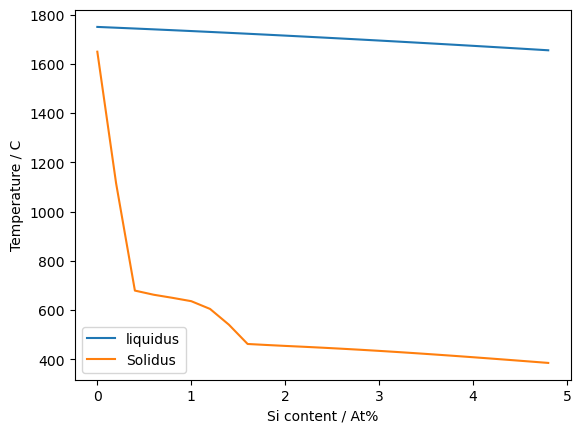

In [65]:
plt.plot(SolidusLiquidus_SiVar_TCHEA6["Si fraction / At%"], SolidusLiquidus_SiVar_TCHEA6["Liquidus / C"], label = "liquidus")
plt.plot(SolidusLiquidus_SiVar_TCHEA6["Si fraction / At%"], SolidusLiquidus_SiVar_TCHEA6["Solidus / C"], label = "Solidus")


plt.xlabel("Si content / At%")
plt.ylabel("Temperature / C")
plt.legend()
plt.show()

In [66]:
SolidusLiquidus_SiVar_TiVNbTa_TCHEA6 = npyToDataframe("SolidusLiquidusData_Si variation_TiVNbTa_TCNI11_09oct23.npy", ["Si fraction / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_SiVar_TiVNbTa_TCHEA6

,Si fraction / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,0.0,2403.248448,2130.108448,2211.518910,1938.378910,191.729538
1,0.2,2400.591086,2127.451086,922.153176,649.013176,1478.437910
2,0.4,2397.897880,2124.757880,972.414205,699.274205,1425.483675
3,0.6,2395.167790,2122.027790,958.690372,685.550372,1436.477418
4,0.8,2392.399737,2119.259737,944.528373,671.388373,1447.871364
5,1.0,2389.592602,2116.452602,929.868961,656.728961,1459.723641
6,1.2,2386.745226,2113.605226,914.643271,641.503271,1472.101955
7,1.4,2383.856409,2110.716409,898.770812,625.630812,1485.085597
8,1.6,2380.924908,2107.784908,880.954958,607.814958,1499.969949
9,1.8,2377.949436,2104.809436,873.961259,600.821259,1503.988176


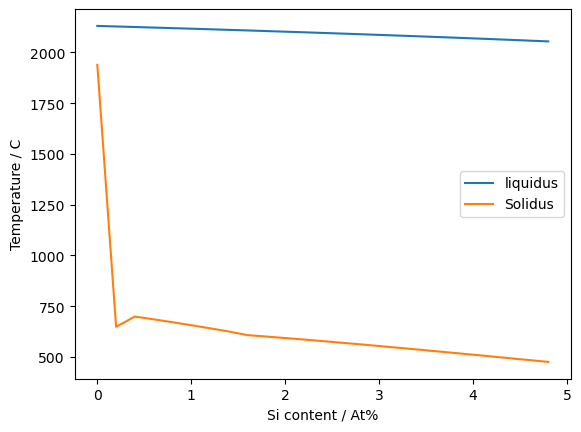

In [67]:
plt.plot(SolidusLiquidus_SiVar_TiVNbTa_TCHEA6["Si fraction / At%"], SolidusLiquidus_SiVar_TiVNbTa_TCHEA6["Liquidus / C"], label = "liquidus")
plt.plot(SolidusLiquidus_SiVar_TiVNbTa_TCHEA6["Si fraction / At%"], SolidusLiquidus_SiVar_TiVNbTa_TCHEA6["Solidus / C"], label = "Solidus")


plt.xlabel("Si content / At%")
plt.ylabel("Temperature / C")
plt.legend()
plt.show()

In [68]:
def plotLiquidusSolidus(dataframe):
    plt.plot(dataframe["Si fraction / At%"], dataframe["Liquidus / C"], label = "liquidus")
    plt.plot(dataframe["Si fraction / At%"], dataframe["Solidus / C"], label = "Solidus")


    plt.xlabel("Cr content / At%")
    plt.ylabel("Temperature / C")
    plt.legend()
    plt.show()
    return

In [69]:
SolidusLiquidus_CrVar_TiVNbHf_TCHEA6 = npyToDataframe("SolidusLiquidusData_Cr variation_TiVNbHf_TCNI11_09oct23.npy", ["Si fraction / At%", "Liquidus / K", "Liquidus / C", "Solidus / K", "Solidus / C", "deltaT / K"])
SolidusLiquidus_CrVar_TiVNbHf_TCHEA6

,Si fraction / At%,Liquidus / K,Liquidus / C,Solidus / K,Solidus / C,deltaT / K
0,0.0,2023.285211,1750.145211,1922.702391,1649.562391,100.582821
1,1.0,2014.011535,1740.871535,1903.048015,1629.908015,110.963520
2,2.0,2004.961208,1731.821208,1884.608405,1611.468405,120.352802
3,3.0,1996.137403,1722.997403,1867.403382,1594.263382,128.734021
4,4.0,1987.543107,1714.403107,1851.444800,1578.304800,136.098307
5,5.0,1979.181243,1706.041243,1836.737684,1563.597684,142.443559
6,6.0,1971.054790,1697.914790,1823.281478,1550.141478,147.773312
7,7.0,1963.166913,1690.026913,1811.071341,1537.931341,152.095572
8,8.0,1955.521090,1682.381090,1800.099440,1526.959440,155.421650
9,9.0,1948.121246,1674.981246,1790.356189,1517.216189,157.765057


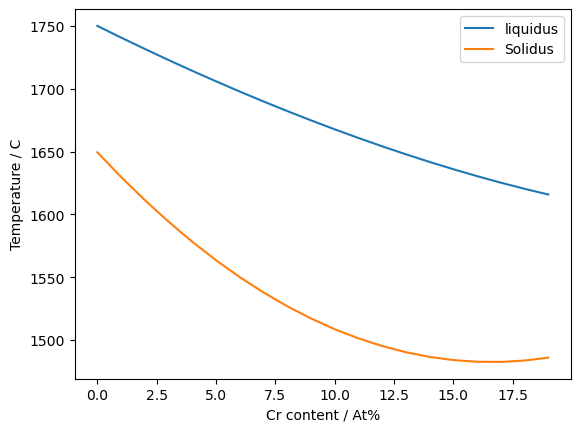

In [70]:
plotLiquidusSolidus(SolidusLiquidus_CrVar_TiVNbHf_TCHEA6)

In [71]:
#in celsius
SolidusLiquidus_TCNI8_C = np.load("SolidusLiquidusData_TCNI8_09oct23.npy")

toCelcius = SolidusLiquidus_TCNI8_C[1:3]
toCelcius = toCelcius.astype('float32')
toCelcius = toCelcius - 273.14
toCelcius

SolidusLiquidus_TCNI8_C[1:3] = toCelcius

SolidusLiquidus_TCNI8_C = np.transpose(SolidusLiquidus_TCNI8_C)

SolidusLiquidus_TCNI8_C_DF = pd.DataFrame(SolidusLiquidus_TCNI8_C)
SolidusLiquidus_TCNI8_C_DF.columns = ["Alloy composition / At%", "Liquidus / C", "Solidus / C", "deltaT / C"]
SolidusLiquidus_TCNI8_C_DF



ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements